### 导入车辆轨迹

In [36]:
import pandas as pd
import numpy as np

from datetime import datetime

from collections import Counter

fpath='../比赛/轨迹数据.txt'

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
#简化流程
import pickle
with open('df', 'rb') as f:
    df = pickle.load(f)
df.head()    

,vehicle-id,time,x-coordinate,y-coordinate,speed,category,time2
29194,c243b97c579b441827b59ade5f9c5c3b,1493852410,521579.616152,57525.893385,9.2,1,0
24479,f9643897f57a000c2facc2fe39de8947,1493852411,521461.647074,56693.716517,7.2,1,1
29195,c243b97c579b441827b59ade5f9c5c3b,1493852413,521575.164460,57498.213683,9.3,1,3
24480,f9643897f57a000c2facc2fe39de8947,1493852414,521466.098708,56716.931752,7.8,1,4
29196,c243b97c579b441827b59ade5f9c5c3b,1493852416,521570.712769,57467.855299,10.2,1,6


In [3]:
df=pd.read_csv(fpath)#轨迹数据.txt 格式有问题，每个行尾多了个，号
df=df.sort_values(by='time')

In [30]:
# df2=df[df['vehicle-id']=='4c0c4745067197be22182d262b44f48a']
df2=df[df['vehicle-id']=='aa7c4004477b1e8147166e93aaa6ab0a']
# df2=df[df['vehicle-id']=='f3bc6bd1462edd25f7ae844143e8f65d']
df2=df2.sort_values(by='time')
df2.head()

,vehicle-id,time,x-coordinate,y-coordinate,speed,category,time2
456,aa7c4004477b1e8147166e93aaa6ab0a,1493858760,521674.215171,58147.347356,7.8,1,6350
457,aa7c4004477b1e8147166e93aaa6ab0a,1493858763,521669.763429,58120.560547,9.2,1,6353
458,aa7c4004477b1e8147166e93aaa6ab0a,1493858766,521665.311690,58088.416376,10.7,1,6356
459,aa7c4004477b1e8147166e93aaa6ab0a,1493858769,521659.747018,58052.700630,12.0,1,6359
460,aa7c4004477b1e8147166e93aaa6ab0a,1493858772,521654.182351,58012.520417,13.8,1,6362


In [60]:
df21=df[df['vehicle-id']=='4c0c4745067197be22182d262b44f48a']
df22=df[df['vehicle-id']=='aa7c4004477b1e8147166e93aaa6ab0a']
df23=df[df['vehicle-id']=='f3bc6bd1462edd25f7ae844143e8f65d']
df24=df21.append(df22).append(df23)
df24.head()

,vehicle-id,time,x-coordinate,y-coordinate,speed,category,time2
0,4c0c4745067197be22182d262b44f48a,1493859164,521696.473915,55061.506951,6.6,0,6754
1,4c0c4745067197be22182d262b44f48a,1493859167,521680.892788,55051.685121,6.1,0,6757
2,4c0c4745067197be22182d262b44f48a,1493859170,521665.311690,55041.863291,6.2,0,6760
3,4c0c4745067197be22182d262b44f48a,1493859173,521648.617687,55030.255674,6.9,0,6763
4,4c0c4745067197be22182d262b44f48a,1493859176,521628.584926,55019.540951,7.2,0,6766


In [26]:
def time_to_hour(x):
    dt=datetime.fromtimestamp(x)
    return dt.day

In [21]:
# dt=datetime.fromtimestamp(1493853539)
# dt.date(),dt.day

In [28]:
dt1=df2['time'].apply(time_to_hour)#没用
c=Counter(list(dt1))
c

Counter({4: 76})

In [31]:
#要按时间排序
x=list(df2['x-coordinate'])
#x[:10]
y=list(df2['y-coordinate'])
#y[:10]

In [32]:
cargps=[(a,b)  for a,b in zip(x,y)]

In [9]:
from config import cross_cord

In [10]:
cx=[];cy=[]
for z in range(1,8):
#     print(z)
    cx.append(cross_cord[str(z)]['x'])
    cy.append(cross_cord[str(z)]['y'])
print(cx,cy)

[521677, 521580, 521520, 521452, 521433, 521411, 521400] [58109, 57466, 57059, 56668, 55855, 54822, 53998]


In [38]:
labels = ['X{0}'.format(i) for i in range(1,8)]
labels

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7']

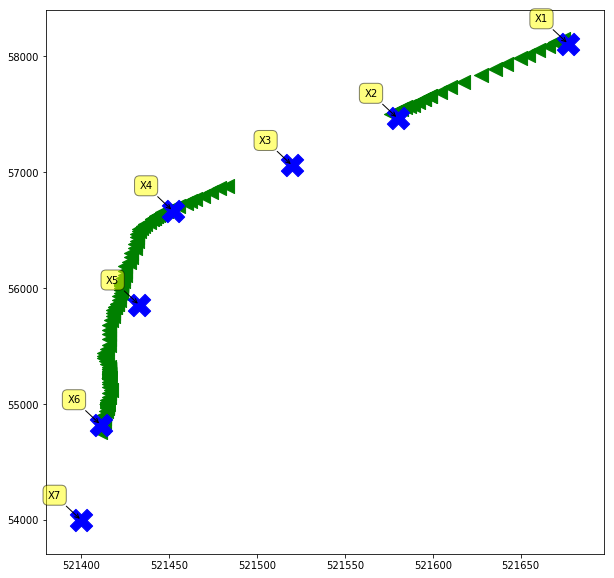

In [39]:
%matplotlib inline
fig = plt.figure(figsize = (10,10))
plt.scatter(x,y, 200, color ='green',marker='<')
plt.scatter(cx,cy, 500, color ='blue',marker='X')
for label, x1, y1 in zip(labels, cx, cy):
    plt.annotate(
        label,
        xy=(x1, y1), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
    
plt.show()

<IPython.core.display.Javascript object>


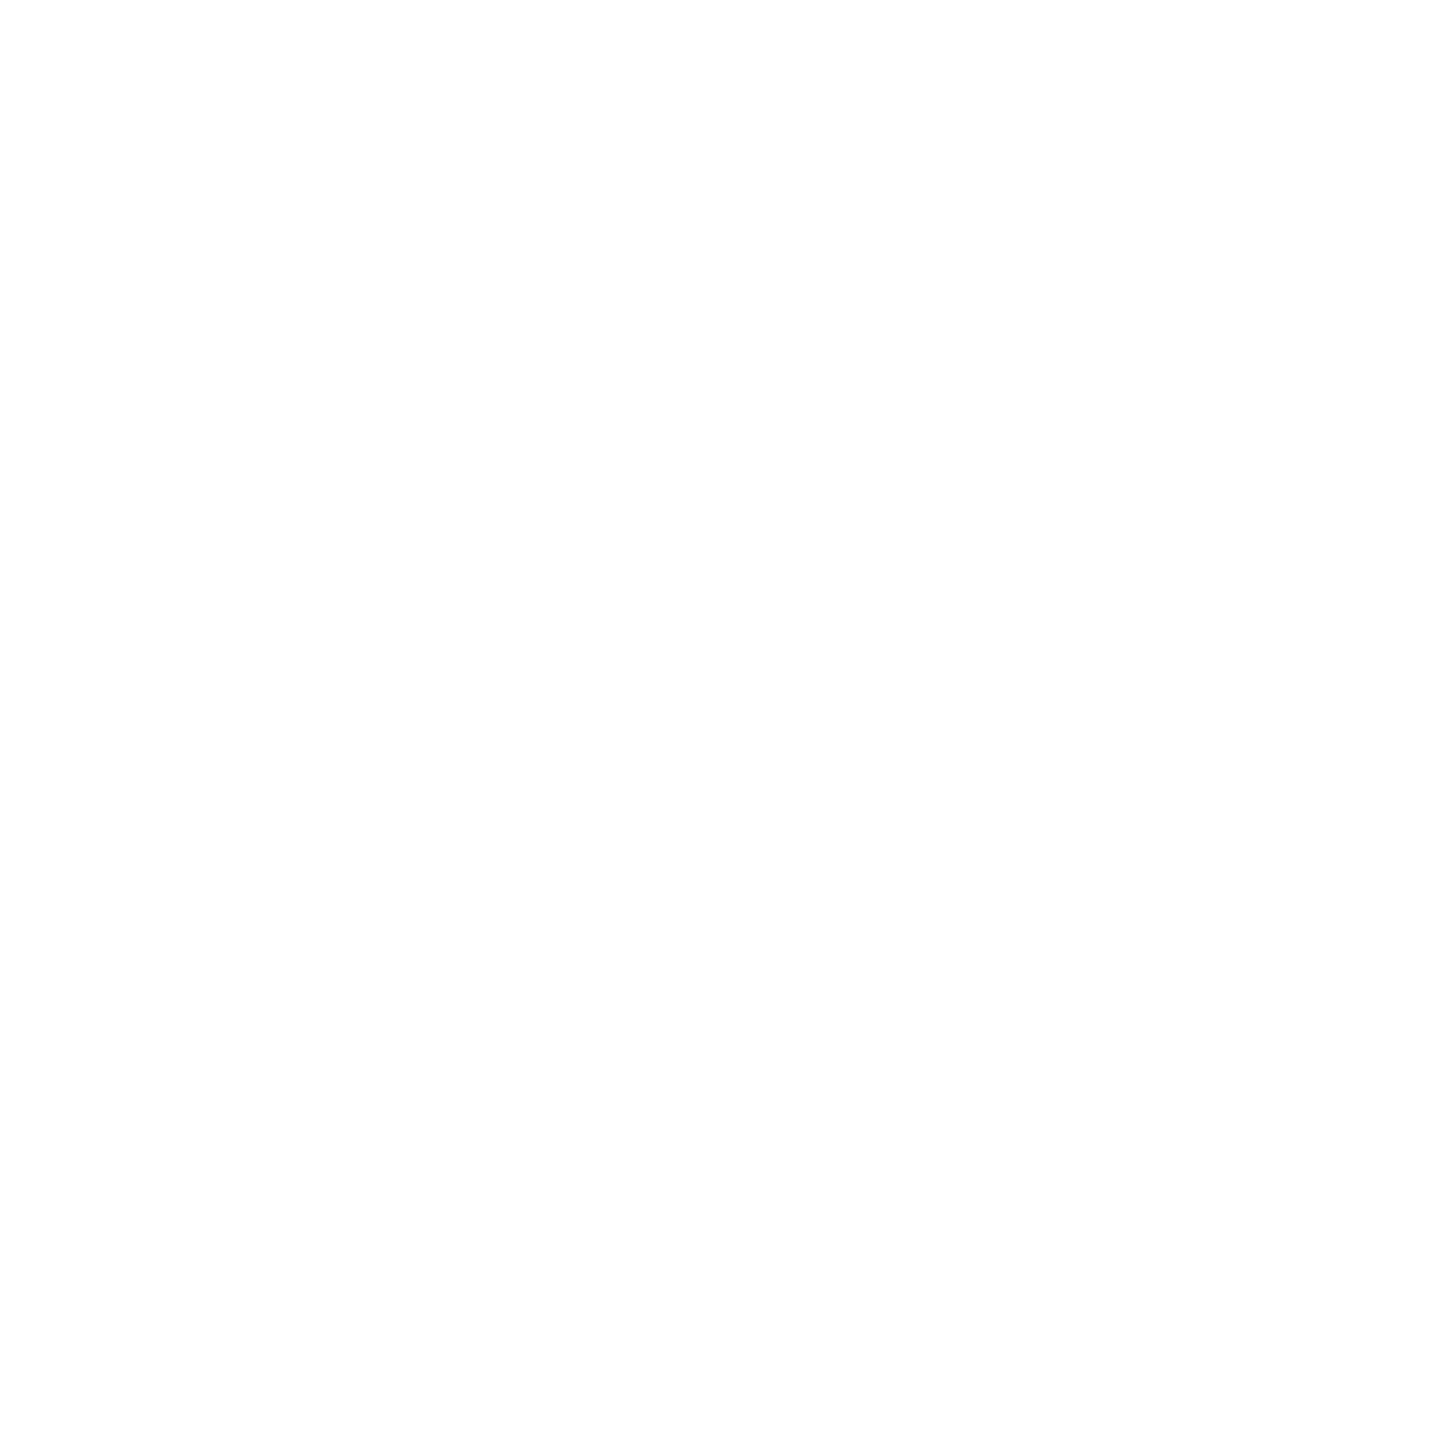

<IPython.core.display.Javascript object>


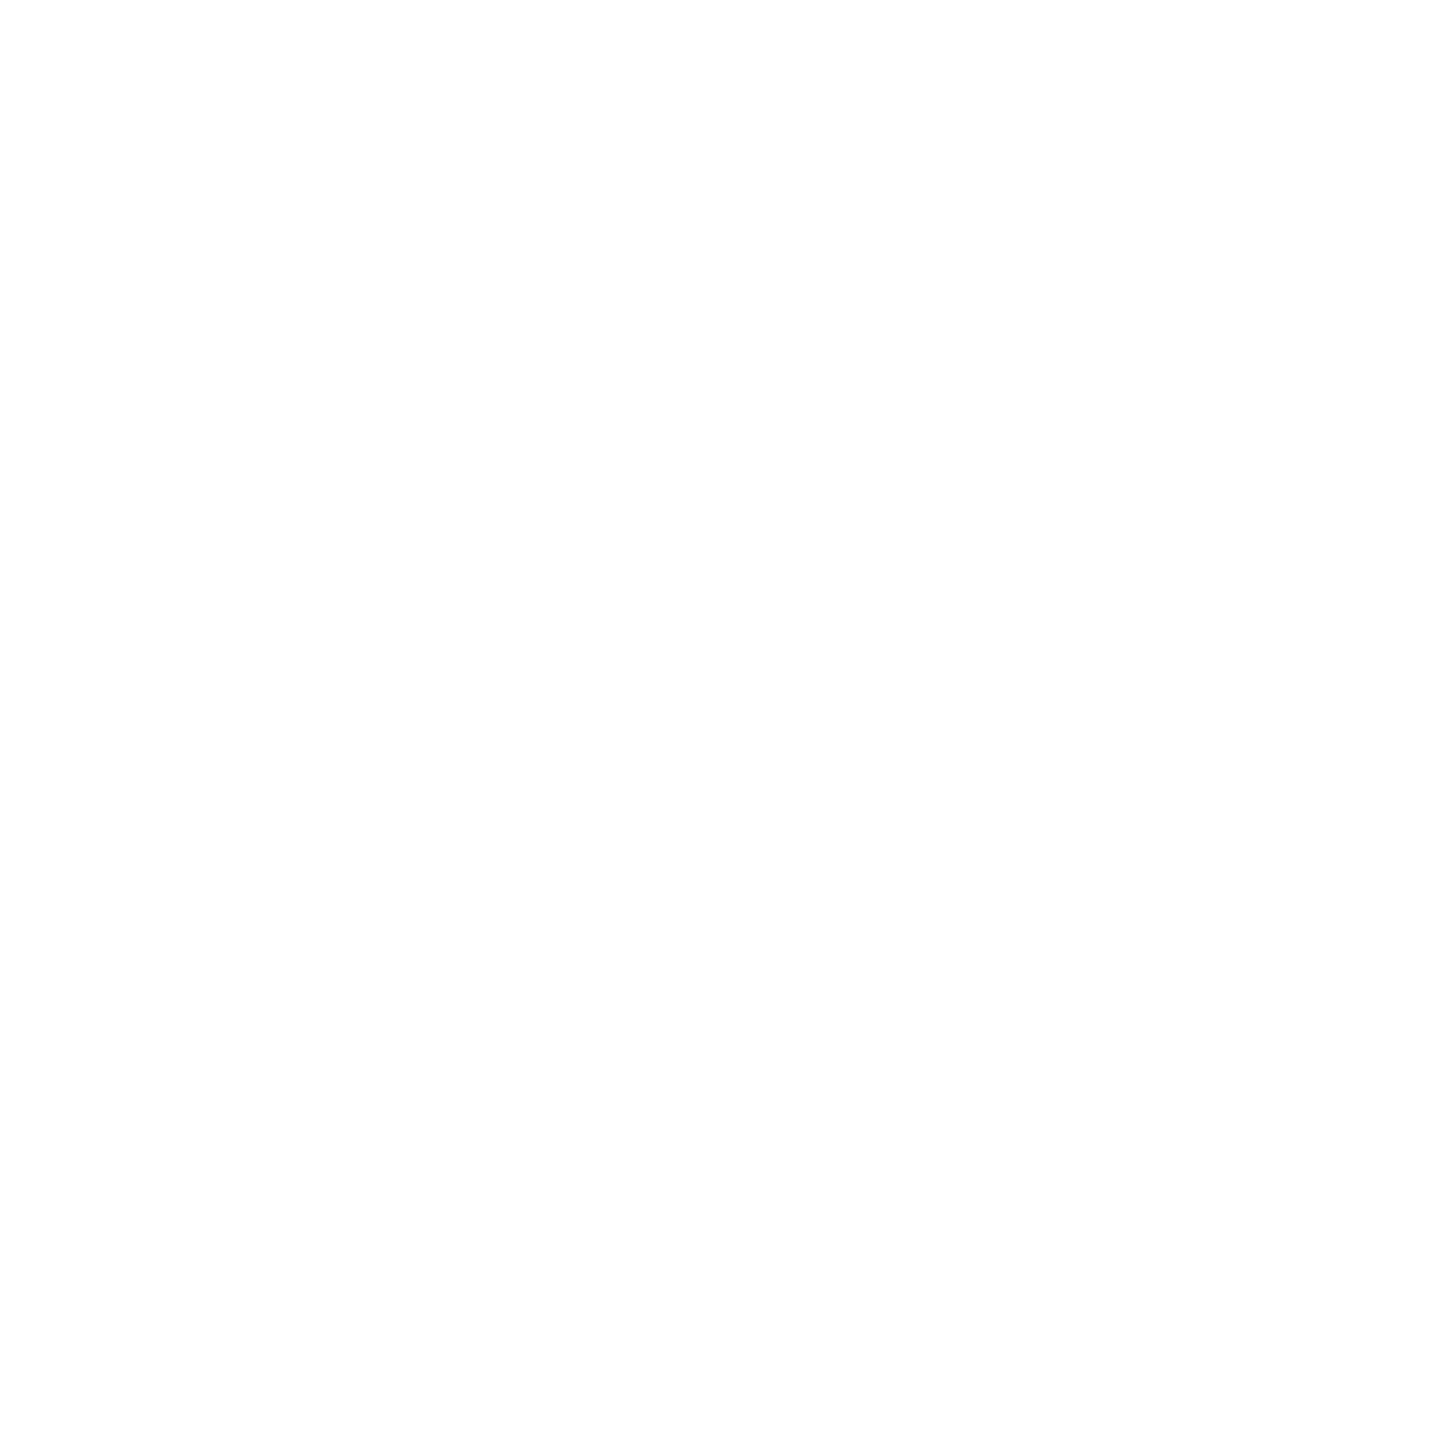

In [40]:
#动态显示轨迹图,2天,经过2个十字路口
%matplotlib notebook
#要切回inline模式
fig = plt.figure(figsize = (10,10))
# fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

ax1.scatter(cx,cy, 500, color ='blue',marker='X')

for x1,y1 in zip(x,y):
    ax1.scatter(x1,y1, 100, color ='green',marker='<')
#     plt.pause(0.1)#不能取消
    fig.canvas.draw()

plt.ioff()
plt.show()

## 经过哪些路口

In [18]:
#阈值
meet_distance=10#车离十字路口多远才算相遇
meet_cross_list=[]
distancelist=[]#所有距离

In [7]:
def dist(x1,x2,y1,y2):
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

In [20]:
for lon,lat in zip(x,y):
    #到路口的距离
    dist_list=[dist(lon,cx1,lat,cy1) for cx1,cy1 in zip(cx,cy)]
#     dist_list=[haversine(lon,cx1,lat,cy1) for cx1,cy1 in zip(cx,cy)]
    
    meet_cross_list.append(dist_list.index(min(dist_list)))
    distancelist+=(dist_list)
#     break

In [21]:
dist_list

[4195.876415632707,
 3548.3154130926359,
 3139.0609237602835,
 2746.288752073744,
 1933.0811766997174,
 899.87494620017378,
 75.841173664223547]

In [22]:
min(dist_list)

75.841173664223547

In [23]:
dist_list.index(min(dist_list))

6

In [95]:
dsl=sorted(distancelist)
dsl[-10:]

[3908.9521719172444,
 3918.7498441239045,
 3932.188301849947,
 3947.3303491056727,
 3974.0522999144541,
 4042.718551057254,
 4079.2421952973928,
 4120.2217391301365,
 4157.6394556365103,
 4195.876415632707]

In [110]:
dsl[:10]

[0.44301073629830162,
 12.302097542100984,
 12.302097542100984,
 21.705958244039877,
 37.433455884356917,
 41.14606334358573,
 52.472113501610806,
 52.472113501610806,
 54.703749335127839,
 64.490076960905682]

In [62]:
min(dsl)

657662.19081313675

In [24]:
from math import radians, cos, sin, asin, sqrt,degrees
  
def haversine(lon1, lat1, lon2, lat2): # 经度1，纬度1，经度2，纬度2 （十进制度数）  
    """ 
    Calculate the great circle distance between two points  
    on the earth (specified in decimal degrees) 
    """  
    # 将十进制度数转化为弧度  
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])  
  
    # haversine公式  
    dlon = lon2 - lon1   
    dlat = lat2 - lat1   
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2  
    c = 2 * asin(sqrt(a))   
    r = 6371 # 地球平均半径，单位为公里  
    return c * r * 1000 
def getDistance(latA, lonA, latB, lonB):
    ra = 6378140  # radius of equator: meter
    rb = 6356755  # radius of polar: meter
    flatten = (ra - rb) / ra  # Partial rate of the earth
    # change angle to radians
    radLatA = radians(latA)
    radLonA = radians(lonA)
    radLatB = radians(latB)
    radLonB = radians(lonB)

    pA = atan(rb / ra * tan(radLatA))
    pB = atan(rb / ra * tan(radLatB))
    x = acos(sin(pA) * sin(pB) + cos(pA) * cos(pB) * cos(radLonA - radLonB))
    c1 = (sin(x) - x) * (sin(pA) + sin(pB))**2 / cos(x / 2)**2
    c2 = (sin(x) + x) * (sin(pA) - sin(pB))**2 / sin(x / 2)**2
    dr = flatten / 8 * (c1 - c2)
    distance = ra * (x + dr)
    return distance

In [25]:
c=Counter(meet_cross_list)
c.most_common()#经过第6,7个路口
#不一定
#[(5, 48), (6, 25)],先经过第6个路口,再经过第7个路口

[(5, 51), (6, 25)]

In [26]:
len(meet_cross_list)

76

# 7个十字路口之间的距离

In [13]:
cr=[(a,b)  for a,b in zip(cx,cy)]
cr

[(521677, 58109),
 (521580, 57466),
 (521520, 57059),
 (521452, 56668),
 (521433, 55855),
 (521411, 54822),
 (521400, 53998)]

In [14]:
cross_distence=[]
for (a,b),(c,d) in zip(cr[:-1],cr[1:]):
    dst=dist(a,c,b,d)
#     print(dst)
    cross_distence.append(dst)
cross_distence  ,min(cross_distence)  

([650.275326304174,
  411.3988332506547,
  396.86899601757756,
  813.2219869137823,
  1033.234242560708,
  824.0734190592486],
 396.86899601757756)

In [15]:
min_distence=min(cross_distence)/2-10
min_distence#386.86899601757756
#188.43449800878878

188.43449800878878

In [46]:
dist_list=[]
meet_cross_list=[]
for lon,lat in zip(x,y):
    #到路口的距离
    dist_list=[dist(lon,cx1,lat,cy1) for cx1,cy1 in zip(cx,cy)]
#     dist_list=[haversine(lon,cx1,lat,cy1) for cx1,cy1 in zip(cx,cy)]
#     dist_list=[di<min_distence for di in dist_list ]
    for i,di in enumerate(dist_list ):
        if di<min_distence :
            meet_cross_list.append(i)
    
#     meet_cross_list.append(dist_list.index(True))
#     distancelist+=(dist_list)
#     break
dist_list    

[4195.876415632707,
 3548.3154130926359,
 3139.0609237602835,
 2746.288752073744,
 1933.0811766997174,
 899.87494620017378,
 75.841173664223547]

In [49]:
#第二版
dist_list=[]
meet_cross_list=[]
for lon,lat in zip(x,y):
    #到路口的距离
    dist_list=[dist(lon,cx1,lat,cy1) for cx1,cy1 in zip(cx,cy)]
#     dist_list=[haversine(lon,cx1,lat,cy1) for cx1,cy1 in zip(cx,cy)]
#     dist_list=[di<min_distence for di in dist_list ]
    dist_min=min(dist_list)
    if dist_min<min_distence :
            meet_cross_list.append(dist_list.index(dist_min))
#     for i,di in enumerate(dist_list ):
#         if di<min_distence :
#             meet_cross_list.append(i)
    
#     meet_cross_list.append(dist_list.index(True))
#     distancelist+=(dist_list)
#     break
dist_list    

[4195.876415632707,
 3548.3154130926359,
 3139.0609237602835,
 2746.288752073744,
 1933.0811766997174,
 899.87494620017378,
 75.841173664223547]

In [50]:
print(meet_cross_list)

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6]


In [32]:
#经过路口的先后顺序
passed_cross_order=[meet_cross_list[0]]
for cro in meet_cross_list[1:]:
#     if cro not in passed_cross_order:
    if cro != passed_cross_order[-1]:
        passed_cross_order.append(cro)
passed_cross_order        

[5, 6]

In [120]:
#方向?
#东往西
# 用前3个坐标减去后3个坐标

In [6]:
from math import radians, cos, sin, asin, sqrt,degrees,atan2
#求两个经纬点的方位角，P0(latA, lonA), P1(latB, lonB)
def getDegree(latA, lonA, latB, lonB):
    """
    Args:
        point p1(latA, lonA)
        point p2(latB, lonB)
    Returns:
        bearing between the two GPS points,
        default: the basis of heading direction is north
    """
    radLatA = radians(latA)
    radLonA = radians(lonA)
    radLatB = radians(latB)
    radLonB = radians(lonB)
    dLon = radLonB - radLonA
    y = sin(dLon) * cos(radLatB)
    x = cos(radLatA) * sin(radLatB) - sin(radLatA) * cos(radLatB) * cos(dLon)
    brng = degrees(atan2(y, x))
    brng = (brng + 360) % 360
    return brng
"""
真方位角 (True bearing)
所有角度以正北方设为000°，顺时针转一圈后的角度为360°。
因此：
正北方：000°或360°
正东方：090°
正南方：180°
正西方：270°
"""

'\n真方位角 (True bearing)\n所有角度以正北方设为000°，顺时针转一圈后的角度为360°。\n因此：\n正北方：000°或360°\n正东方：090°\n正南方：180°\n正西方：270°\n'

In [47]:
# cargps


In [57]:
from statistics import mean ,median
first=0
last=0
angle_list=[]
tmp_list=[]
near=False
cha_list=[]
cha_tangle_list=[]
direction_list=[]

In [58]:

#车辆的方位角,序列
for (a,b),(c,d) in zip(cargps[:-1],cargps[1:]):
    #
    degre=getDegree(a,b,c,d)
    
    #
    dist_list=[dist(a,cx1,b,cy1) for cx1,cy1 in zip(cx,cy)]
    dist_min=min(dist_list)
    if dist_min<min_distence-20 :
        print('方位角:',degre,end='\t')
        near=True
#             meet_cross_list.append(dist_list.index(dist_min))
        cross_id=dist_list.index(dist_min)#附近的十字路口
        print('cross_id:',cross_id,end='\t')
        #
        c_c_d=dist(a,cx[cross_id],b,cy[cross_id])#到十字路口的距离
        print('到十字路口的距离',c_c_d)
        
        #
        tmp_list.append(degre)
    else:
        print('方位角:',degre)
        if near is True:
            cha=abs(mean(tmp_list)-median(tmp_list))
            print('平均-中位数:',cha)
            cha_list.append(cha)
            print('--------')
            tmp_list=[tm for tm in tmp_list if tm !=0]
            tangle=abs(tmp_list[1]-tmp_list[-2])
            cha_tangle_list.append(tangle)
            dire='直行' if tangle<25 else '左转'
            direction_list.append((cross_id,dire))
            print(dire,tangle)
            print(tmp_list)
            print('--------')
            
            
            tmp_list=[]
        near=False
        
        
        
    

    #
    d22=dist(a,c,b,d)#两个gps的距离
#     if d22>100:#min_distence:
    if d22>min_distence:
        print('又一条轨迹!两个gps的距离:',d22)
        
#
if near is True:
            cha=abs(mean(tmp_list)-median(tmp_list))
            print('平均-中位数:',cha)
            cha_list.append(cha)
            print('--------')
            tmp_list=[tm for tm in tmp_list if tm !=0]
            tangle=abs(tmp_list[1]-tmp_list[-2])
            cha_tangle_list.append(tangle)
            dire='直行' if tangle<25 else '左转'
            direction_list.append((cross_id,dire))
            print(dire,tangle)
            print(tmp_list)
            print('--------')
            
            
            tmp_list=[]
print(cha_list,'\n',cha_tangle_list,'\n',direction_list)            

#0.0表示静止状态,堵车?    
'''
5	157.927388185	141.68166002238866
5	113.135056128	150.5074276567322
5	86.6421889901	148.11033352604363
5	54.7037493351	102.2993303749206
5	21.705958244	105.46753118381855
5	12.3020975421	0.0
5	12.3020975421	107.74716368621074
5	52.4721135016	0.0
5	52.4721135016	106.62866338892826
5	95.3297287634	108.8042985890936
5	143.545458496	111.21532988788897
#转弯,转了141-111=30度
'''

方位角: 266.3088327656517	cross_id: 0	到十字路口的距离 38.4483417685
方位角: 268.94828980878043	cross_id: 0	到十字路口的距离 13.6387025328
方位角: 267.78126673494546	cross_id: 0	到十字路口的距离 23.6707027279
方位角: 268.1990099193134	cross_id: 0	到十字路口的距离 58.8836518084
方位角: 264.53504649582476	cross_id: 0	到十字路口的距离 99.1410865471
方位角: 263.45672889973014	cross_id: 0	到十字路口的距离 128.863418211
方位角: 261.8128057889558
平均-中位数: 0.5068539795909146
--------
直行 4.413243312955672
[266.3088327656517, 268.94828980878043, 267.78126673494546, 268.1990099193134, 264.53504649582476, 263.45672889973014]
--------
方位角: 257.6048857383476
方位角: 251.06989691497773
方位角: 249.0976248641445
方位角: 249.68235845806518
方位角: 247.62753120722073
方位角: 0.0
方位角: 251.23085890347875
方位角: 0.0	cross_id: 1	到十字路口的距离 165.952137247
方位角: 250.06241639565582	cross_id: 1	到十字路口的距离 165.952137247
方位角: 248.35254199113547	cross_id: 1	到十字路口的距离 140.754224854
方位角: 249.43748179389692	cross_id: 1	到十字路口的距离 119.12939337
方位角: 246.9013731823481	cross_id: 1	到十字路口的距离 105.618644882
方位角: 248.61

'\n5\t157.927388185\t141.68166002238866\n5\t113.135056128\t150.5074276567322\n5\t86.6421889901\t148.11033352604363\n5\t54.7037493351\t102.2993303749206\n5\t21.705958244\t105.46753118381855\n5\t12.3020975421\t0.0\n5\t12.3020975421\t107.74716368621074\n5\t52.4721135016\t0.0\n5\t52.4721135016\t106.62866338892826\n5\t95.3297287634\t108.8042985890936\n5\t143.545458496\t111.21532988788897\n#转弯,转了141-111=30度\n'

In [42]:
getDegree(x[0],y[0],x[1],y[1])

204.99344096628482

In [43]:
#用车辆的2个GPS坐标与十字路口计算方位角,
#1个也行?
getDegree(x[0],y[0],cx[5],cy[5])

262.2426331503581

In [ ]:
#车辆排队,方位角+车到十字路口的距离?
#方位角,怎么映射到方向?
#每个车辆的方位角都不一样

In [61]:
#该车的车速
df2['speed'].min(),df2['speed'].max(),df2['speed'].mean(),df2['speed'].median()

(0.0, 22.899999999999999, 8.0276315789473696, 8.5)

In [60]:
#全体车速
df['speed'].min(),df['speed'].max(),df['speed'].mean(),df['speed'].median()

(0.0, 101.8, 4.5332464165278674, 2.1)